## Notebook for some of the commands tried 

## Getting bamCoverage on the trimmed cellranger count bam files

## Run STAR with the same parameters cellranger used
STAR_2.5.1b was used
### Concatenate fastq

In [1]:
import os
from os.path import join, basename, dirname

## File names

In [2]:
genomedir = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star"
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"

outdir = join(indir, "homebrew/")
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = join(outdir, "bam/")
if not os.path.exists(outdir):
    os.mkdir(outdir)

    
ID = "bc5prime_A"
f1 = join(indir,"trimmed_BC_5Prime_031020_A_R1.concat.fastq")
f2 = join(indir,"trimmed_BC_5Prime_031020_A_R2.concat.fastq")

# Concatenate 
# ID = "bc5prime_A_1"
# f1 = join(indir,"trimmed_BC_5Prime_031020_A_1_S173_L003_R1_001.fastq")
# f2 = join(indir,"trimmed_BC_5Prime_031020_A_1_S173_L003_R2_001.fastq")

## Run cutadapt properly


In [3]:
indir = "/data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/"
A1_R1 = "BC_5Prime_031020_A_1_S173_L003_R1_001.fastq.gz"
A1_R2 = "BC_5Prime_031020_A_1_S173_L003_R2_001.fastq.gz"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/"
if not os.path.exists(outdir):
    os.mkdir(outdir)
trim_A1_R1 = "trimmed_" + A1_R1
trim_A1_R2 = "trimmed_" + A1_R2


A1_R1 = join(indir,A1_R1)
A1_R2 = join(indir,A1_R2)

trim_A1_R1 = join(outdir,trim_A1_R1)
trim_A1_R2 = join(outdir,trim_A1_R2)

In [4]:
adaptor = 'AAGCAGTGGTATCAACGCAGAGTAC'
cmd = f'cutadapt -g {adaptor} --minimum-length 20 --cores=16 -o tmp.1.fastq -p tmp.2.fastq {A1_R1} {A1_R2}'
print(cmd)
!{cmd}
cmd = f"cutadapt -q 15 -g {adaptor} --minimum-length 20 -o {trim_A1_R2} -p {trim_A1_R1} tmp.2.fastq tmp.1.fastq"
print(cmd)
!{cmd}
cmd = "rm tmp.1.fastq tmp.2.fastq"
print(cmd)
!{cmd}

cutadapt -g AAGCAGTGGTATCAACGCAGAGTAC --minimum-length 20 --cores=16 -o tmp.1.fastq -p tmp.2.fastq /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/BC_5Prime_031020_A_1_S173_L003_R1_001.fastq.gz /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/BC_5Prime_031020_A_1_S173_L003_R2_001.fastq.gz
This is cutadapt 2.9 with Python 3.7.3
Command line parameters: -g AAGCAGTGGTATCAACGCAGAGTAC --minimum-length 20 --cores=16 -o tmp.1.fastq -p tmp.2.fastq /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/BC_5Prime_031020_A_1_S173_L003_R1_001.fastq.gz /data2/isshamie/mito_lineage/data/raw/200403_A00953_0090_BHC23FDSXY/BC_5Prime_031020_A_1_S173_L003_R2_001.fastq.gz
Processing reads on 16 cores in paired-end mode ...
[          8<] 00:03:01    14,208,130 reads  @     12.8 µs/read;   4.70 M reads/minute
Finished in 181.41 s (13 us/read; 4.70 M reads/minute).

=== Summary ===

Total read pairs processed:         14,208,130
  Read 1 with adapter:     

In [4]:
# cmd = "cat trimmed_BC_5Prime_031020_A_D_*R1*.fastq.gz > trimmed_BC_5Prime_031020_AD_R1.concat.fastq.gz"
# cmd = "cat trimmed_BC_5Prime_031020_A_D_*R2*.fastq.gz > trimmed_BC_5Prime_031020_AD_R2.concat.fastq.gz"
# cmd = "cat trimmed_BC_5Prime_031020_A_1_S173_L003_R1_001*fastq.gz trimmed_BC_5Prime_031020_A_2_S174_L003_R1_001*fastq.gz trimmed_BC_5Prime_031020_A_3_S175_L003_R1*fastq.gz trimmed_BC_5Prime_031020_A_4_S176_L003_R1_001*fastq.gz > trimmed_BC_5Prime_031020_A_R1.concat.fastq.gz"
# cmd = "cat trimmed_BC_5Prime_031020_A_1_S173_L003_R2_001*fastq.gz trimmed_BC_5Prime_031020_A_2_S174_L003_R2_001*fastq.gz trimmed_BC_5Prime_031020_A_3_S175_L003_R2*fastq.gz trimmed_BC_5Prime_031020_A_4_S176_L003_R2_001*fastq.gz > trimmed_BC_5Prime_031020_A_R2.concat.fastq.gz"

## Command
(we need 2.5)

In [5]:
!which STAR

/home/isshamie/software/STAR-2.5.3a/bin/Linux_x86_64/STAR


In [27]:
cmd = f"STAR --runThreadN 4  --genomeDir {genomedir}  --readFilesIn {trim_A1_R1} {trim_A1_R2} --outFileNamePrefix {join(outdir, ID)} --outSAMtype SAM   --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
print(cmd)
#os.system(cmd)

#!{cmd}

STAR --runThreadN 4  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/trimmed_BC_5Prime_031020_A_1_S173_L003_R1_001.fastq.gz /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/trimmed_BC_5Prime_031020_A_1_S173_L003_R2_001.fastq.gz --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/bc5prime_A --outSAMtype SAM   --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:bc5prime_A:0:1:HC23FDSXY:3   SM:bc5prime_A LB:0.1 PU:bc5prime_A:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615


### Run STAR with parameters for matching lowered

In [35]:
cmd = f"STAR --runThreadN 4  --genomeDir {genomedir}  --readFilesIn {trim_A1_R1} {trim_A1_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} --outSAMtype SAM   --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"

add_params = " --outFilterScoreMinOverLread 0.1 --outFilterMatchNminOverLread 0.1"
cmd = cmd + add_params
print(cmd)

STAR --runThreadN 4  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/trimmed_BC_5Prime_031020_A_1_S173_L003_R1_001.fastq.gz /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/trimmed_BC_5Prime_031020_A_1_S173_L003_R2_001.fastq.gz --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v04/bc5prime_A.lowerParams --outSAMtype SAM   --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:bc5prime_A:0:1:HC23FDSXY:3   SM:bc5prime_A LB:0.1 PU:bc5prime_A:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.1 --outFilterMatchNminOverLread 0.1


## Run

## Bamcoverage

cmd = "mkdir bamcoverage"
cmd = 'bamCoverage -b bc5prime_fiveprime_A_1/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_fiveprime_A_1.bw -p 20'
cmd = "bamCoverage -b bc5prime_sc5p_pe_lanes/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_sc5p_pe_lanes -p 20"

In [ ]:
bamcoverage_dir = join(outdir,"bamcov")
for i in glob.glob(outidr + "/*.bam"):
    cmd =  f"bamCoverage {i} -o {join(bamcoverage_dir,basename(i)+'.bw')} -p 10"
    print(cmd)

## Plot mapq values (take first 60000)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
sam_f = "../data/processed/mttrace/A/00_bam/A.sam"
sam = pd.read_csv(sam_f,sep="\t",skiprows=10000,nrows=60000,header=None, comment="@",usecols=np.arange(6))
sam.head()

,0,1,2,3,4,5
0,A00953:90:HC23FDSXY:3:2524:26928:34695,1171,12,122981133,255,101M
1,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
2,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
3,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S
4,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MAPQ')

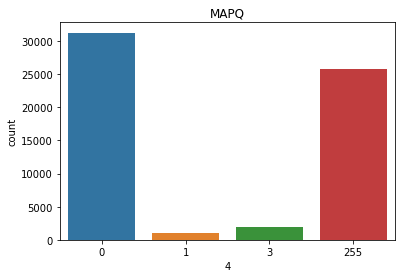

In [10]:
sns.countplot(sam[4])
plt.title("MAPQ")

In [ ]:
Read Name
SAM flag
chromosome (if read is has no alignment, there will be a “*” here)
position (1-based index, “left end of read”)
MAPQ (mapping quality — describes the uniqueness of the alignment, 0=non-unique, >10 probably unique)
CIGAR string (describes the position of insertions/deletions/matches in the alignment, encodes splice junctions, for example)
Name of mate (mate pair information for paired-end sequencing, often “=”)
Position of mate (mate pair information)
Template length (always zero for me)
Read Sequence
Read Quality
Program specific Flags (i.e. AS is an alignment score, NH is a number of reported alignments that contains the query in the current record)

In [15]:
unmapped = sam[sam[4] == 0]
unmapped


,0,1,2,3,4,5
9,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
10,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
19,A00953:90:HC23FDSXY:3:1428:16405:1658,419,12,124911922,0,14S62M
21,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911997,0,15S61M
22,A00953:90:HC23FDSXY:3:2350:10041:20071,419,12,124912052,0,101M
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [18]:
print(f"Number of duplicated reads: {unmapped[0].duplicated().sum()}")

Number of duplicated reads: 27094


In [20]:
print(f"Number of reads mapped to *: {(unmapped[2]=='*').sum()}")

Number of reads mapped to *: 5775


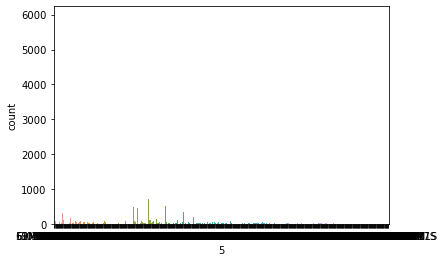

In [21]:
sns.countplot(unmapped[5])

In [35]:
(~sam[sam[4] == 0].duplicated()).sum()

26305

In [37]:
((~sam[sam[4] == 0].duplicated()) & ~(sam[2]=="*")).sum()

20909

In [32]:
sam[(sam[4] == 0) & (sam[2] == "*")]

,0,1,2,3,4,5
54225,A00953:90:HC23FDSXY:3:1102:10755:20744,77,*,0,0,*
54226,A00953:90:HC23FDSXY:3:1102:10755:20744,141,*,0,0,*
54227,A00953:90:HC23FDSXY:3:1104:11912:30671,77,*,0,0,*
54228,A00953:90:HC23FDSXY:3:1104:11912:30671,141,*,0,0,*
54229,A00953:90:HC23FDSXY:3:1104:2166:14043,77,*,0,0,*
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [38]:
print("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG")

AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG


In [39]:
print(len("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG"))

45


In [43]:
cmd = "cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32"
print(cmd)

cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32


In [40]:
print(len("AAGCAGTGGTATCAACGCAGAGTAC"))

25
